# Restaurant Recommendation System
## Exploratory Data Analysis and Visualisations

In [1]:
import pandas as pd
import numpy as np

In [33]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pwd

'/Users/jamesmoulds/Desktop/projects/capstone/capstone_project/notebooks'

In [5]:
!ls

Data Cleaning.ipynb          User Data EDA.ipynb
Google Api Calls-Copy1.ipynb Yelp API Request.ipynb
Google Api Calls.ipynb       edinburgh_reviews.csv
Restaurant Data EDA.ipynb    nested_info.csv


In [6]:
df_biz = pd.read_csv('../data/yelp_data/yelp_business.csv')
df_attr = pd.read_csv('../data/yelp_data/yelp_business_attributes.csv')

In [7]:
pd.set_option('display.max_columns', None)

### Business data high level review

In [8]:
df_biz.head()

business_id                        name neighborhood  \
0  FYWN1wneV18bWNgQjJ2GNg          "Dental by Design"          NaN   
1  He-G7vWjzVUysIKrfNbPUQ       "Stephen Szabo Salon"          NaN   
2  KQPW8lFf1y5BT2MxiSZ3QA     "Western Motor Vehicle"          NaN   
3  8DShNS-LuFqpEWIp0HxijA          "Sports Authority"          NaN   
4  PfOCPjBrlQAnz__NXj9h_w  "Brick House Tavern + Tap"          NaN   

                            address            city state postal_code  \
0        "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ       85044   
1              "3101 Washington Rd"        McMurray    PA       15317   
2          "6025 N 27th Ave, Ste 1"         Phoenix    AZ       85017   
3  "5000 Arizona Mills Cr, Ste 435"           Tempe    AZ       85282   
4                    "581 Howe Ave"  Cuyahoga Falls    OH       44221   

    latitude   longitude  stars  review_count  is_open  \
0  33.330690 -111.978599    4.0            22        1   
1  40.291685  -80.104900    3.0            11        1   
2  33.524903 -112.115310    1.5            18        1   
3  33.383147 -111.964725    3.0             9        0   
4  41.119535  -81.475690    3.5           116        1   

                                          categories  
0  Dentists;General Dentistry;Health & Medical;Or...  
1  Hair Stylists;Hair Salons;Men's Hair Salons;Bl...  
2  Departments of Motor Vehicles;Public Services ...  
3                            Sporting Goods;Shopping  
4  American (New);Nightlife;Bars;Sandwiches;Ameri...

In [11]:
df_biz.shape

(174567, 13)

In [12]:
df_biz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174567 entries, 0 to 174566
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   174567 non-null  object 
 1   name          174567 non-null  object 
 2   neighborhood  68015 non-null   object 
 3   address       174567 non-null  object 
 4   city          174566 non-null  object 
 5   state         174566 non-null  object 
 6   postal_code   173944 non-null  object 
 7   latitude      174566 non-null  float64
 8   longitude     174566 non-null  float64
 9   stars         174567 non-null  float64
 10  review_count  174567 non-null  int64  
 11  is_open       174567 non-null  int64  
 12  categories    174567 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 17.3+ MB


### Business Attributes High Level Review

In [13]:
df_attr.head()

business_id AcceptsInsurance ByAppointmentOnly  \
0  FYWN1wneV18bWNgQjJ2GNg               Na                Na   
1  He-G7vWjzVUysIKrfNbPUQ               Na                Na   
2  8DShNS-LuFqpEWIp0HxijA               Na                Na   
3  PfOCPjBrlQAnz__NXj9h_w               Na                Na   
4  o9eMRCWt5PkpLDE0gOPtcQ               Na                Na   

  BusinessAcceptsCreditCards BusinessParking_garage BusinessParking_street  \
0                         Na                   True                     Na   
1                         Na                     Na                     Na   
2                         Na                     Na                     Na   
3                         Na                     Na                     Na   
4                         Na                     Na                  False   

  BusinessParking_validated BusinessParking_lot BusinessParking_valet  \
0                        Na                  Na                    Na   
1                        Na                  Na                    Na   
2                        Na                  Na                    Na   
3                        Na                  Na                    Na   
4                     False               False                 False   

  HairSpecializesIn_coloring HairSpecializesIn_africanamerican  \
0                         Na                                Na   
1                         Na                                Na   
2                         Na                                Na   
3                         Na                                Na   
4                      False                                Na   

  HairSpecializesIn_curly HairSpecializesIn_perms HairSpecializesIn_kids  \
0                      Na                      Na                     Na   
1                      Na                      Na                     Na   
2                      Na                      Na                     Na   
3                      Na                      Na                     Na   
4                      Na                      Na                     Na   

  HairSpecializesIn_extensions HairSpecializesIn_asian  \
0                           Na                      Na   
1                           Na                      Na   
2                           Na                      Na   
3                           Na                      Na   
4                           Na                      Na   

  HairSpecializesIn_straightperms RestaurantsPriceRange2 GoodForKids  \
0                              Na                     Na          Na   
1                              Na                     Na          Na   
2                              Na                     Na          Na   
3                              Na                     Na          Na   
4                              Na                     Na          Na   

  WheelchairAccessible BikeParking Alcohol HasTV NoiseLevel RestaurantsAttire  \
0                   Na          Na      Na    Na         Na                Na   
1                   Na        True      Na    Na         Na                Na   
2                   Na          Na    True    Na         Na                Na   
3                   Na          Na      Na    Na         Na                Na   
4                   Na       False      Na    Na         Na                Na   

  Music_dj Music_background_music Music_no_music Music_karaoke Music_live  \
0       Na                     Na             Na            Na         Na   
1       Na                     Na             Na            Na         Na   
2       Na                     Na             Na            Na         Na   
3       Na                     Na             Na            Na         Na   
4       Na                     Na             Na            Na         Na   

  Music_video Music_jukebox Ambience_romantic Ambience_intimate  \
0          Na            Na                Na                Na   
1

In [14]:
df_attr.shape

(152041, 82)

In [15]:
df_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152041 entries, 0 to 152040
Data columns (total 82 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   business_id                        152041 non-null  object
 1   AcceptsInsurance                   152041 non-null  object
 2   ByAppointmentOnly                  152041 non-null  object
 3   BusinessAcceptsCreditCards         152041 non-null  object
 4   BusinessParking_garage             152041 non-null  object
 5   BusinessParking_street             152041 non-null  object
 6   BusinessParking_validated          152041 non-null  object
 7   BusinessParking_lot                152041 non-null  object
 8   BusinessParking_valet              152041 non-null  object
 9   HairSpecializesIn_coloring         152041 non-null  object
 10  HairSpecializesIn_africanamerican  152041 non-null  object
 11  HairSpecializesIn_curly            152041 non-null  

In [17]:
#Check number of null values
df_biz.isnull().sum()

business_id          0
name                 0
neighborhood    106552
address              0
city                 1
state                1
postal_code        623
latitude             1
longitude            1
stars                0
review_count         0
is_open              0
categories           0
dtype: int64

In [18]:
#let's drop the next-to-useless neighborhood column as it is infested with nulls. 
df_biz.drop(columns='neighborhood', inplace=True)

In [19]:
df_biz.head()

business_id                        name  \
0  FYWN1wneV18bWNgQjJ2GNg          "Dental by Design"   
1  He-G7vWjzVUysIKrfNbPUQ       "Stephen Szabo Salon"   
2  KQPW8lFf1y5BT2MxiSZ3QA     "Western Motor Vehicle"   
3  8DShNS-LuFqpEWIp0HxijA          "Sports Authority"   
4  PfOCPjBrlQAnz__NXj9h_w  "Brick House Tavern + Tap"   

                            address            city state postal_code  \
0        "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ       85044   
1              "3101 Washington Rd"        McMurray    PA       15317   
2          "6025 N 27th Ave, Ste 1"         Phoenix    AZ       85017   
3  "5000 Arizona Mills Cr, Ste 435"           Tempe    AZ       85282   
4                    "581 Howe Ave"  Cuyahoga Falls    OH       44221   

    latitude   longitude  stars  review_count  is_open  \
0  33.330690 -111.978599    4.0            22        1   
1  40.291685  -80.104900    3.0            11        1   
2  33.524903 -112.115310    1.5            18        1   
3  33.383147 -111.964725    3.0             9        0   
4  41.119535  -81.475690    3.5           116        1   

                                          categories  
0  Dentists;General Dentistry;Health & Medical;Or...  
1  Hair Stylists;Hair Salons;Men's Hair Salons;Bl...  
2  Departments of Motor Vehicles;Public Services ...  
3                            Sporting Goods;Shopping  
4  American (New);Nightlife;Bars;Sandwiches;Ameri...

In [20]:
df_biz.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'categories'],
      dtype='object')

In [179]:
# df1 = df['city'].str.contains("London")
# df1

We're looking to create a recommender for London so let's see how many London entries we have?

In [21]:
df_biz[df_biz.city.str.contains('Lond',case=False, na=False)]

business_id    name          address    city state  \
153780  u5kz5EpdSoRNUvKMXtGQfw  "Asda"  "Old Kent Road"  London   EDH   

       postal_code   latitude  longitude  stars  review_count  is_open  \
153780     EH7 5TQ  55.956276  -3.163425    3.0             4        1   

                                               categories  
153780  Professional Services;Graphic Design;Accessori...

Only One!!! Yelp what have you done!!! 
We were expecting a decent London centric data set but this is not the case. Let's see if we can keep the project UK based by searching appropriate latitude values. 

In [22]:
df_biz[df_biz['longitude'].between(-4, 0, inclusive=False)].head()

business_id                           name  \
68   F31RycVVooeIOp9jsXmg6g            "The Bluebird Cafe"   
214  KbSoYXHUz_Bjo-v0VWHDrw            "St. Andrew Square"   
266  Po2W_ZiJdxItHHll4WP5WA  "Thomsons World Of Furniture"   
353  3gM8zh_OaubYXNnQNxAYKQ                     "Planet X"   
380  inaACfObL1NBNJmBG11iuQ                  "Global Deli"   

                             address         city state postal_code  \
68                    "5 Canonmills"    Edinburgh   MLN     EH3 5HA   
214                   "St Andrew Sq"    Edinburgh   EDH       EH1 1   
266        "Kingseat Road, Halbeath"  Dunfermline   FIF    KY11 8PQ   
353          "74 South Clerk Street"    Edinburgh   EDH         EH8   
380  "13 George IV Bridge, Old Town"    Edinburgh   EDH     EH1 1EE   

      latitude  longitude  stars  review_count  is_open  \
68   55.962444  -3.197662    4.5            16        1   
214  55.953860  -3.191788    4.5            14        1   
266  56.082844  -3.402846    3.5             3        1   
353  55.939643  -3.180275    2.5             3        1   
380  55.947960  -3.192143    4.0            13        1   

                                            categories  
68   Breakfast & Brunch;Diners;Restaurants;Cafes;Br...  
214                     Active Life;Parks;Local Flavor  
266            Shopping;Home & Garden;Furniture Stores  
353  Sports Wear;Sporting Goods;Shopping;Bikes;Fashion  
380     Restaurants;Food;Sandwiches;Coffee & Tea;Delis

It looks like Edinburgh could be well respresented in this set. Let's see if there's anything to work with?

In [23]:
edin = df_biz[df_biz.city.str.contains('Edin',case=False, na=False)]
edin.head()

business_id                 name  \
68   F31RycVVooeIOp9jsXmg6g  "The Bluebird Cafe"   
214  KbSoYXHUz_Bjo-v0VWHDrw  "St. Andrew Square"   
353  3gM8zh_OaubYXNnQNxAYKQ           "Planet X"   
380  inaACfObL1NBNJmBG11iuQ        "Global Deli"   
397  Di5ApLgoQpcv5Aew82fI_A     "The Rendezvous"   

                             address       city state postal_code   latitude  \
68                    "5 Canonmills"  Edinburgh   MLN     EH3 5HA  55.962444   
214                   "St Andrew Sq"  Edinburgh   EDH       EH1 1  55.953860   
353          "74 South Clerk Street"  Edinburgh   EDH         EH8  55.939643   
380  "13 George IV Bridge, Old Town"  Edinburgh   EDH     EH1 1EE  55.947960   
397          "10 Queensferry Street"  Edinburgh   EDH     EH2 4PG  55.950550   

     longitude  stars  review_count  is_open  \
68   -3.197662    4.5            16        1   
214  -3.191788    4.5            14        1   
353  -3.180275    2.5             3        1   
380  -3.192143    4.0            13        1   
397  -3.209454    3.5            19        1   

                                            categories  
68   Breakfast & Brunch;Diners;Restaurants;Cafes;Br...  
214                     Active Life;Parks;Local Flavor  
353  Sports Wear;Sporting Goods;Shopping;Bikes;Fashion  
380     Restaurants;Food;Sandwiches;Coffee & Tea;Delis  
397                      Restaurants;Cantonese;Chinese

In [24]:
edin_rest = edin[edin.categories.str.contains('Rest', case=False, na=False)]
edin_rest.head()

business_id                   name  \
68   F31RycVVooeIOp9jsXmg6g    "The Bluebird Cafe"   
380  inaACfObL1NBNJmBG11iuQ          "Global Deli"   
397  Di5ApLgoQpcv5Aew82fI_A       "The Rendezvous"   
420  OvbLKXkJCg8ZMHX9L5faIA    "Bread Meats Bread"   
446  T2jfXhvQPk9wLdt1OVV-Kg  "Rose Street Brewery"   

                             address       city state postal_code   latitude  \
68                    "5 Canonmills"  Edinburgh   MLN     EH3 5HA  55.962444   
380  "13 George IV Bridge, Old Town"  Edinburgh   EDH     EH1 1EE  55.947960   
397          "10 Queensferry Street"  Edinburgh   EDH     EH2 4PG  55.950550   
420                "92 Lothian Road"  Edinburgh   EDH     EH3 9BE  55.946390   
446              "55-57 Rose Street"  Edinburgh   EDH     EH2 2NH  55.952835   

     longitude  stars  review_count  is_open  \
68   -3.197662    4.5            16        1   
380  -3.192143    4.0            13        1   
397  -3.209454    3.5            19        1   
420  -3.205829    4.0            28        1   
446  -3.198560    3.0            24        1   

                                            categories  
68   Breakfast & Brunch;Diners;Restaurants;Cafes;Br...  
380     Restaurants;Food;Sandwiches;Coffee & Tea;Delis  
397                      Restaurants;Cantonese;Chinese  
420                                Burgers;Restaurants  
446  Pubs;Whiskey Bars;Nightlife;Breakfast & Brunch...

In [27]:
edin_rest.business_id.nunique()

1605

In [25]:
edin_rest.shape

(1605, 12)

In [185]:
edin_rest.review_count.sum()

28404

In [39]:
edin_rest.to_csv('restaurants.csv')

So there are 1605 restaurant entries for Edinburgh. And atotal of 28404 reviews. 

In [186]:
#calculate average number of reviews per resturant in Edinburgh. 

Our original plan was to use the yelp open source database to form our base data set for a London centric recommendation engine. It turns ourt there is only one business listed in London within the data set. However we found that Edinburgh is rather well represented in comparison with 1605 restaurant entries.  Should we opt for Edinburgh and see if we can also gather data from yelp and google api to add to the mix. 

Let's just double check that Edinburgh is indeed our top listed city in the UK. Let's start by visualising the top listed cities in the entire data set! We'll filter for restaurants as we're not interested in other business types. 

In [187]:
#First we'll create a dataframe solely comprised of restaurants
top_listed = df[df.categories.str.contains('Rest', case=False, na=False)]
top_listed.head(2)

business_id                        name           address  \
4  PfOCPjBrlQAnz__NXj9h_w  "Brick House Tavern + Tap"    "581 Howe Ave"   
5  o9eMRCWt5PkpLDE0gOPtcQ                   "Messina"  "Richterstr. 11"   

             city state postal_code   latitude  longitude  stars  \
4  Cuyahoga Falls    OH       44221  41.119535  -81.47569    3.5   
5       Stuttgart    BW       70567  48.727200    9.14795    4.0   

   review_count  is_open                                         categories  
4           116        1  American (New);Nightlife;Bars;Sandwiches;Ameri...  
5             5        1                                Italian;Restaurants

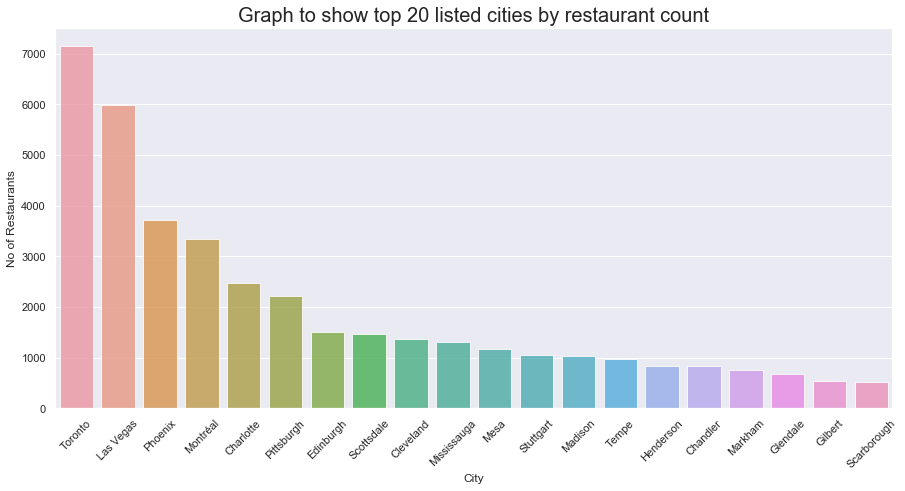

In [188]:
# Create visualisation 
city = top_listed['city'].value_counts()
city = city.sort_values(ascending=False).iloc[0:20]

plt.figure(figsize=(15,7))

ax = sns.barplot(city.index, city.values, alpha=0.8)

plt.title('Graph to show top 20 listed cities by restaurant count', fontsize=20)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('No of Restaurants')
plt.xlabel('City')



plt.show()

Edinburgh is 7th in the list of most restaurants. If we wanted to prioritise any proof of concept there may be an argument that we should opt for Toronto as our target city! However as we intend to utilise an API to introduce more data then let's see how we can improve the Endinburgh data set first.

Let's explore the Edinburgh data set some more in its current form. 

## Ratings

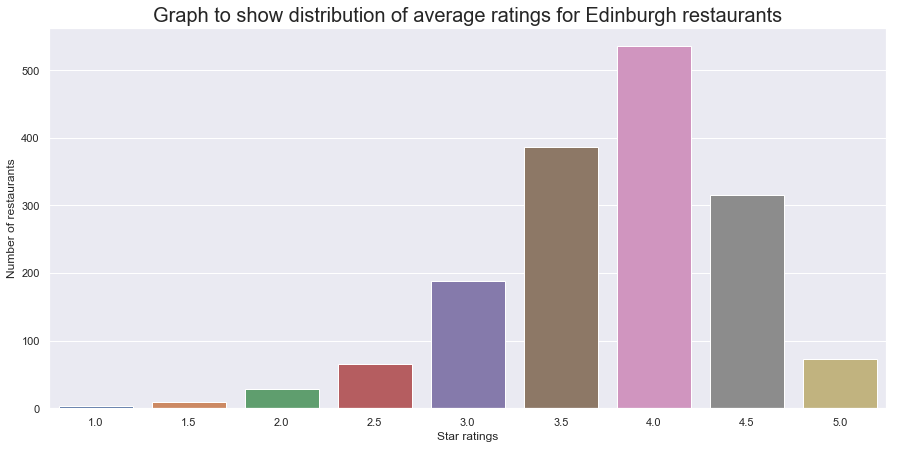

In [189]:
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize': (15,7)})
sns.countplot(x='stars', data=edin_rest)#.set_title("Graph to show distribution of ratings")
plt.title('Graph to show distribution of average ratings for Edinburgh restaurants', fontsize=20)
plt.ylabel('Number of restaurants', fontsize=12)
plt.xlabel('Star ratings', fontsize=12)
plt.show()

In [190]:
review_count = edin_rest[['stars', 'review_count']]
print(review_count.shape)
review_count.head()

(1605, 2)


stars  review_count
68     4.5            16
380    4.0            13
397    3.5            19
420    4.0            28
446    3.0            24

## Most Reviewed

In [28]:
edin_rest.head(2)

business_id                 name  \
68   F31RycVVooeIOp9jsXmg6g  "The Bluebird Cafe"   
380  inaACfObL1NBNJmBG11iuQ        "Global Deli"   

                             address       city state postal_code   latitude  \
68                    "5 Canonmills"  Edinburgh   MLN     EH3 5HA  55.962444   
380  "13 George IV Bridge, Old Town"  Edinburgh   EDH     EH1 1EE  55.947960   

     longitude  stars  review_count  is_open  \
68   -3.197662    4.5            16        1   
380  -3.192143    4.0            13        1   

                                            categories  
68   Breakfast & Brunch;Diners;Restaurants;Cafes;Br...  
380     Restaurants;Food;Sandwiches;Coffee & Tea;Delis

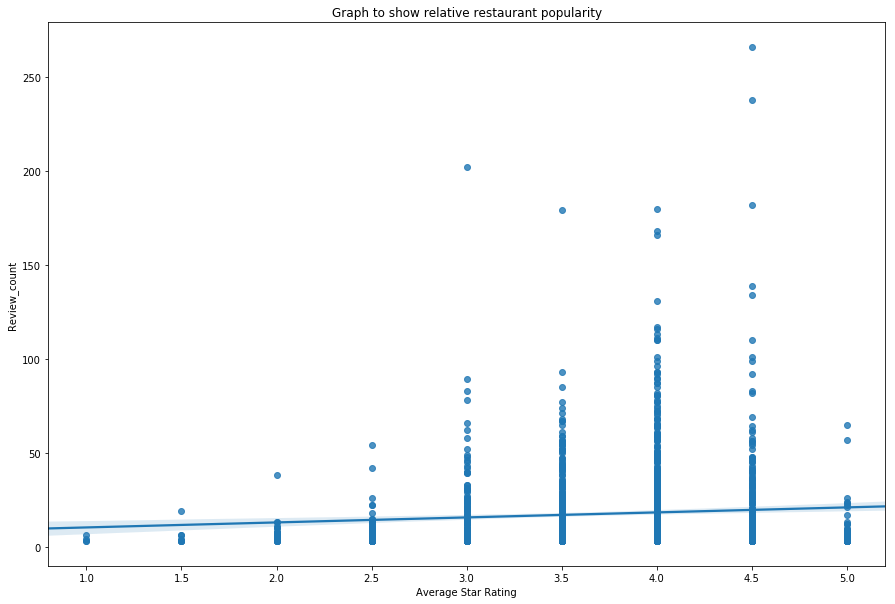

In [38]:
top_restaurants = edin_rest.sort_values(['review_count'],ascending=False).index[:15]

x = edin_rest.stars
y = edin_rest.review_count
labels = edin_rest.name

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x,y)
ax.set_title('Graph to show relative restaurant popularity')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Average Star Rating')
ax.set_ylabel('Review_count')

for i, t in enumerate(labels):
    if t in top_restaurants:
        ax.annotate(t,(x[i],y[i]))

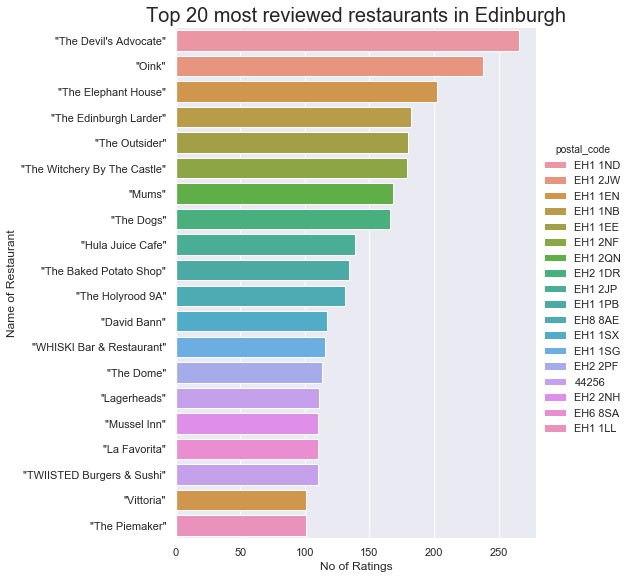

In [191]:
#Let's plot the top 20 most reviewed restaurants in Edinburgh, let's have a look at the postcodes to see 
#if there are any geographical hotspots that we might want to investigate further!


sns.catplot(x='review_count', y='name', data=edin_rest.nlargest(20, 'review_count'), kind='bar',
           hue='postal_code', dodge=False, height=8);
plt.title('Top 20 most reviewed restaurants in Edinburgh', fontsize=20)
plt.xlabel('No of Ratings')
plt.ylabel('Name of Restaurant')
plt.show()

We can see that EH1 as a postal area seems to dominate in terms of highly rated restaurants. 

In [194]:
#Best restaurants by overall stars awarded  - Largely for novelty let's see which restuarants have the most stars?


stars_awarded = edin_rest[['name','stars', 'review_count', 'postal_code', 'categories']]
#stars_awarded['stars_awarded']
stars_awarded['star_count'] = stars_awarded['stars']*stars_awarded['review_count']
stars_awarded.head()

name  stars  review_count postal_code  \
68     "The Bluebird Cafe"    4.5            16     EH3 5HA   
380          "Global Deli"    4.0            13     EH1 1EE   
397       "The Rendezvous"    3.5            19     EH2 4PG   
420    "Bread Meats Bread"    4.0            28     EH3 9BE   
446  "Rose Street Brewery"    3.0            24     EH2 2NH   

                                            categories  star_count  
68   Breakfast & Brunch;Diners;Restaurants;Cafes;Br...        72.0  
380     Restaurants;Food;Sandwiches;Coffee & Tea;Delis        52.0  
397                      Restaurants;Cantonese;Chinese        66.5  
420                                Burgers;Restaurants       112.0  
446  Pubs;Whiskey Bars;Nightlife;Breakfast & Brunch...        72.0

Note to reader and self, bear in mind that a restaurant that has 1 stars across 100 reviews will have more stars than 
a newer restaurant that has 5 stars but only across 19 reviews. Any insight should be viewed with caution. 

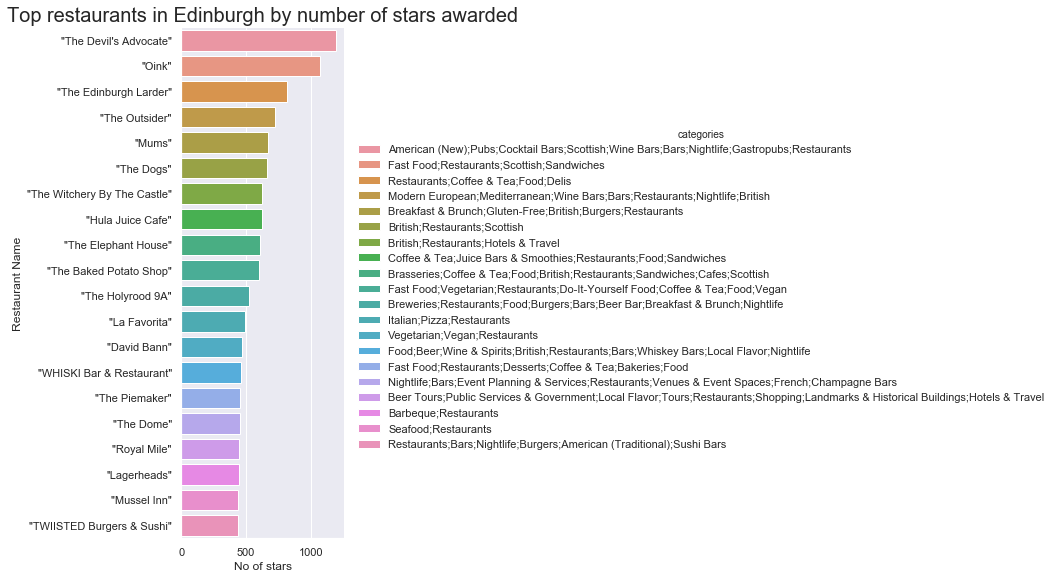

In [290]:
# plt.figure(figsize=(12,7))
sns.catplot(x='star_count', y='name', data=stars_awarded.nlargest(20, 'star_count'), kind='bar', 
           hue='categories', dodge=False, height=8)
plt.title('Top restaurants in Edinburgh by number of stars awarded', fontsize=20)
plt.xlabel('No of stars')
plt.ylabel('Restaurant Name')
plt.show()

We added a category legend to see how the different restaurants are using the category value. After reviewing the yelp literature(link below) it is apparent that there are 22 different major categories with myriad further sub categories that can be listed in this column. Further more it seems on inspection that some businesses can assign multiple major categories, up to a maximum of three according to Yelp rules, meaning that restaurant may not be the primary function and star ratings may reflect quality linked to the other business functions.  (https://blog.yelp.com/2018/01/yelp_category_list#section21) 

## Ratings frequency

In [69]:
edin_rest.head(2)

business_id                 name  \
68   F31RycVVooeIOp9jsXmg6g  "The Bluebird Cafe"   
380  inaACfObL1NBNJmBG11iuQ        "Global Deli"   

                             address       city state postal_code   latitude  \
68                    "5 Canonmills"  Edinburgh   MLN     EH3 5HA  55.962444   
380  "13 George IV Bridge, Old Town"  Edinburgh   EDH     EH1 1EE  55.947960   

     longitude  stars  review_count  is_open  \
68   -3.197662    4.5            16        1   
380  -3.192143    4.0            13        1   

                                            categories  
68   Breakfast & Brunch;Diners;Restaurants;Cafes;Br...  
380     Restaurants;Food;Sandwiches;Coffee & Tea;Delis

In [73]:
edin_rest.loc[edin_rest['stars']==4.5].review_count.sum()

5735

In [77]:
ind_stars = edin_rest['stars'].unique()
ind_stars

array([4.5, 4. , 3.5, 3. , 2.5, 2. , 5. , 1.5, 1. ])

In [103]:
def score_totals(df, x, y):
    '''
    A function to return score totals.
    function is passed a data frame with unique values (x) to be counted, and frequency (y) 
    to be summed over. 
    
    '''
    rating_count = []
    for score in df[x].unique():
        new_score = df.loc[df[x]==score][y].sum()
        rating_count.append(new_score)
    return rating_count
frequency = score_totals(edin_rest, 'stars', 'review_count')
frequency

[5735, 11911, 6474, 2889, 547, 201, 581, 50, 16]

In [82]:
freq_dict = {'rating':ind_stars, 'frequency': frequency }
freq_dict

{'rating': array([4.5, 4. , 3.5, 3. , 2.5, 2. , 5. , 1.5, 1. ]),
 'frequency': [5735, 11911, 6474, 2889, 547, 201, 581, 50, 16]}

In [83]:
freq_df = pd.DataFrame(freq_dict)
freq_df

rating  frequency
0     4.5       5735
1     4.0      11911
2     3.5       6474
3     3.0       2889
4     2.5        547
5     2.0        201
6     5.0        581
7     1.5         50
8     1.0         16

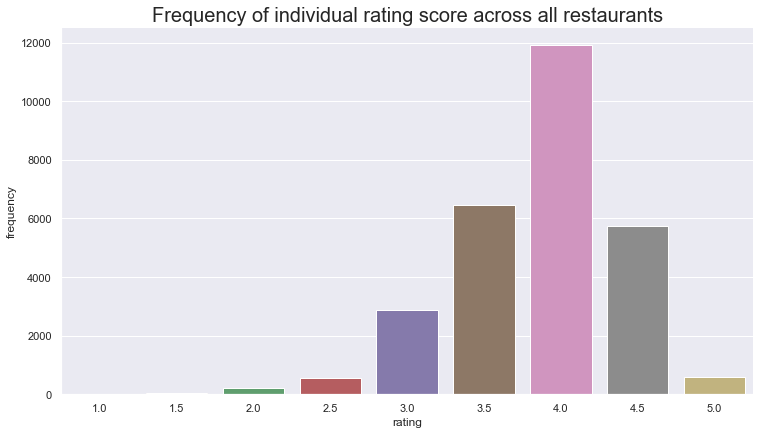

In [138]:
sns.catplot(x='rating', y='frequency', data=freq_df, kind='bar', height=6, aspect=1.8);
plt.title('Frequency of individual rating score across all restaurants', fontsize=20);

## Geographic Visualisations

In [106]:
!pip install geopandas

    100% |████████████████████████████████| 931kB 4.8MB/s ta 0:00:01
    100% |████████████████████████████████| 14.0MB 2.0MB/s ta 0:00:011
    100% |████████████████████████████████| 1.6MB 5.6MB/s ta 0:00:01
    100% |████████████████████████████████| 13.1MB 1.8MB/s ta 0:00:011
    100% |████████████████████████████████| 92kB 7.0MB/s ta 0:00:01
notebook 6.0.2 has requirement jupyter-client>=5.3.4, but you'll have jupyter-client 5.3.3 which is incompatible.
notebook 6.0.2 has requirement jupyter-core>=4.6.0, but you'll have jupyter-core 4.4.0 which is incompatible.
You are using pip version 10.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [117]:
!pip install descartes

notebook 6.0.2 has requirement jupyter-client>=5.3.4, but you'll have jupyter-client 5.3.3 which is incompatible.
notebook 6.0.2 has requirement jupyter-core>=4.6.0, but you'll have jupyter-core 4.4.0 which is incompatible.
You are using pip version 10.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [107]:
import geopandas as gpd

In [141]:
gb = gpd.read_file('../data/geo_data/PostalArea.shp')
gb_dists = gpd.read_file('../data/geo_data/PostalDistrict.shp')
gb_sects = gpd.read_file('../data/geo_data/PostalSector.shp')

In [111]:
gb.head()

AreaID PostArea    AreaName  PCCnt    RefPC       x       y      Sprawl  \
0       1       AB    Aberdeen  16591  AB510JY  380801  823302    Aberdeen   
1       2       AL   St Albans   7764   AL49HQ  518400  210241   St Albans   
2       3        B  Birmingham  41503   B120UF  407660  285144  Birmingham   
3       4       BA        Bath  14838  BA113RD  370585  147293        Bath   
4       5       BB   Blackburn  13036   BB55US  377550  432035   Blackburn   

                                            geometry  
0  MULTIPOLYGON (((414084.362 845858.375, 414080....  
1  POLYGON ((528615.681 207505.032, 528610.750 20...  
2  POLYGON ((430268.493 309809.457, 430215.263 30...  
3  POLYGON ((403898.512 140274.626, 403595.910 14...  
4  POLYGON ((397131.543 438071.073, 397124.073 43...

In [131]:
edin_shape = gb.loc[gb['AreaName']=='Edinburgh']
edin_shape.head()

AreaID PostArea   AreaName  PCCnt    RefPC       x       y     Sprawl  \
32      34       EH  Edinburgh  23831  EH105LG  323354  670686  Edinburgh   

                                             geometry  
32  MULTIPOLYGON (((375449.729 673903.686, 375402....

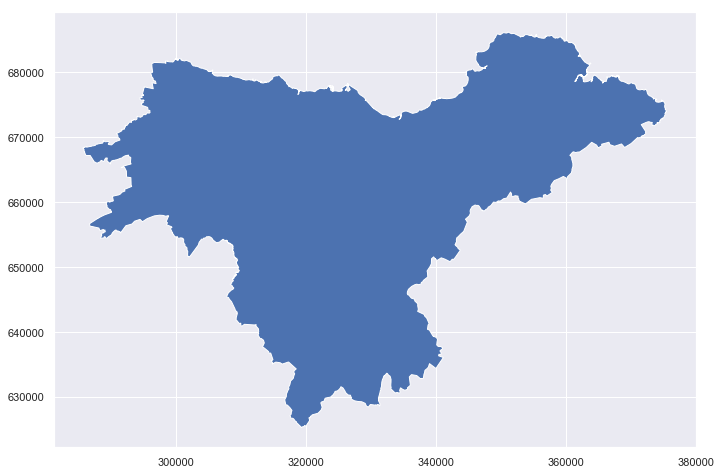

In [119]:
edin_shape.plot()


In [125]:
gb_dists.head(2)

DistID PostDist PostArea DistNum  PCCnt  AnomCnt    RefPC       x       y  \
0       1     AB10       AB      10    725        2  AB106HA  392949  805109   
1       2     AB11       AB      11    660        1  AB115QH  394404  805438   

     Sprawl Locale                                           geometry  
0  Aberdeen   None  POLYGON ((392500.960 805927.935, 392536.991 80...  
1  Aberdeen   None  MULTIPOLYGON (((397283.458 805385.540, 397279....

In [123]:
gb_sects.head(2)

SectID  RMSect GISSect StrSect PostDist PostArea DistNum  SecNum  PCCnt  \
0       1  AB10 1  AB10 1   AB101     AB10       AB      10       1    266   
1       2  AB10 6  AB10 6   AB106     AB10       AB      10       6    243   

   AnomCnt    RefPC       x       y    Sprawl Locale  \
0        0  AB101TH  393574  806073  Aberdeen   None   
1        3  AB106PS  392796  805097  Aberdeen   None   

                                            geometry  
0  POLYGON ((392500.960 805927.935, 392536.991 80...  
1  POLYGON ((391878.013 804752.011, 391878.203 80...

In [127]:
edin_dists = gb_dists.loc[gb_dists['Sprawl']=='Edinburgh']
edin_dists.head(2)

DistID PostDist PostArea DistNum  PCCnt  AnomCnt    RefPC       x  \
688     689      EH1       EH       1    326        0   EH11BL  325688   
689     690     EH10       EH      10    866        0  EH106EW  324424   

          y     Sprawl       Locale  \
688  673712  Edinburgh     Old Town   
689  670314  Edinburgh  Morningside   

                                              geometry  
688  POLYGON ((324508.097 673513.308, 324552.200 67...  
689  POLYGON ((323985.987 669321.038, 323968.977 66...

In [130]:
edin_dists.shape

(17, 12)

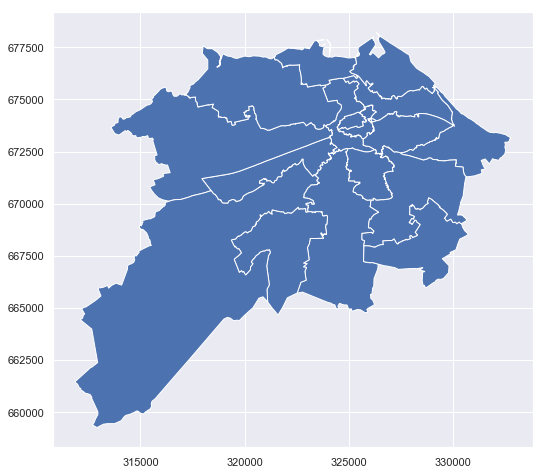

In [129]:
edin_dists.plot()

In [135]:
edin_sects = gb_sects.loc[gb_sects['Sprawl']=='Edinburgh']
edin_sects.head(2)

SectID RMSect GISSect StrSect PostDist PostArea DistNum  SecNum  PCCnt  \
2491    2492  EH1 1  EH 1 1    EH11      EH1       EH       1       1    131   
2492    2493  EH1 2  EH 1 2    EH12      EH1       EH       1       2    106   

      AnomCnt   RefPC       x       y     Sprawl    Locale  \
2491        0  EH11QY  325885  673554  Edinburgh  Old Town   
2492        0  EH12NH  325294  673408  Edinburgh  Old Town   

                                               geometry  
2491  POLYGON ((325519.956 673396.941, 325530.954 67...  
2492  POLYGON ((324508.097 673513.308, 324552.200 67...

In [136]:
edin_sects.shape

(66, 16)

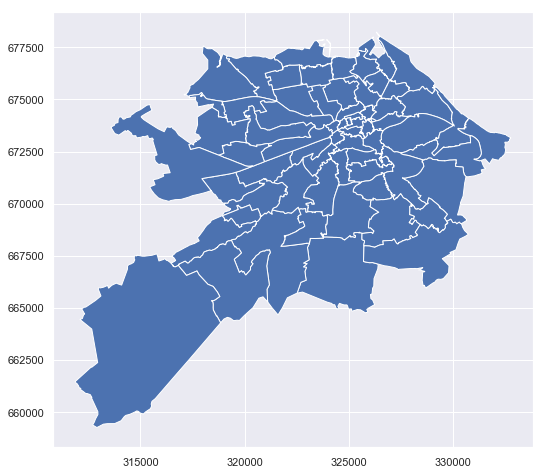

In [134]:
edin_sects.plot()

In [137]:
#Next Steps, overlay the postal sector plot on a open street map style map and create a heat map for the postal codes 
#with the highest average rated restaurants in that locale!!

## Category Data Exploration

In [378]:
cat_df=edin_rest

In [379]:
cat_df['categories'].isnull().sum()

0

In [380]:
cat_df.head()

business_id                   name  \
68   F31RycVVooeIOp9jsXmg6g    "The Bluebird Cafe"   
380  inaACfObL1NBNJmBG11iuQ          "Global Deli"   
397  Di5ApLgoQpcv5Aew82fI_A       "The Rendezvous"   
420  OvbLKXkJCg8ZMHX9L5faIA    "Bread Meats Bread"   
446  T2jfXhvQPk9wLdt1OVV-Kg  "Rose Street Brewery"   

                             address       city state postal_code   latitude  \
68                    "5 Canonmills"  Edinburgh   MLN     EH3 5HA  55.962444   
380  "13 George IV Bridge, Old Town"  Edinburgh   EDH     EH1 1EE  55.947960   
397          "10 Queensferry Street"  Edinburgh   EDH     EH2 4PG  55.950550   
420                "92 Lothian Road"  Edinburgh   EDH     EH3 9BE  55.946390   
446              "55-57 Rose Street"  Edinburgh   EDH     EH2 2NH  55.952835   

     longitude  stars  review_count  is_open  \
68   -3.197662    4.5            16        1   
380  -3.192143    4.0            13        1   
397  -3.209454    3.5            19        1   
420  -3.205829    4.0            28        1   
446  -3.198560    3.0            24        1   

                                            categories  
68   Breakfast & Brunch;Diners;Restaurants;Cafes;Br...  
380     Restaurants;Food;Sandwiches;Coffee & Tea;Delis  
397                      Restaurants;Cantonese;Chinese  
420                                Burgers;Restaurants  
446  Pubs;Whiskey Bars;Nightlife;Breakfast & Brunch...

In [381]:
cat_df['categories'].nunique()

1045

In [382]:
cat_df['categories'].str.strip()

68        Breakfast & Brunch;Diners;Restaurants;Cafes;Br...
380          Restaurants;Food;Sandwiches;Coffee & Tea;Delis
397                           Restaurants;Cantonese;Chinese
420                                     Burgers;Restaurants
446       Pubs;Whiskey Bars;Nightlife;Breakfast & Brunch...
                                ...                        
174207                          Seafood;Italian;Restaurants
174244                         Moroccan;African;Restaurants
174310                Sushi Bars;Japanese;Restaurants;Ramen
174348                                  Italian;Restaurants
174527      Cafes;Local Flavor;Scottish;Restaurants;British
Name: categories, Length: 1605, dtype: object

In [383]:
cat_df['categories'] = cat_df.categories.map(lambda x: [i.strip() for i in sorted(x.split(';'))])
print(cat_df['categories'].map(tuple).nunique())


745


In [346]:
cat_df['num_keywords'] = cat_df['categories'].str.len()
cat_df[['categories', 'num_keywords']].sort_values('num_keywords', ascending=False).head()

categories  num_keywords
168703  [Bakeries, Breakfast & Brunch, Drugstores, Flo...            13
129887  [Active Life, American (Traditional), Bars, Be...            12
169666  [Arts & Entertainment, Bars, Coffee & Tea, Dan...            11
174042  [Bakeries, British, Cafes, Chocolatiers & Shop...            11
99404   [Arts & Entertainment, Bars, Beer, British, Fo...            11

In [ ]:
#Create a function that returns a visual and a dataframe of the most commonly occuring tuples within the categories 
#column. 

In [420]:
cat_df['categories'].map(tuple).to_frame()
# res_list = [i[0] for i in jim ]
# res_list

categories
68      (Breakfast & Brunch, British, Cafes, Diners, R...
380     (Coffee & Tea, Delis, Food, Restaurants, Sandw...
397                     (Cantonese, Chinese, Restaurants)
420                                (Burgers, Restaurants)
446     (Bars, Breakfast & Brunch, Nightlife, Pubs, Re...
...                                                   ...
174207                    (Italian, Restaurants, Seafood)
174244                   (African, Moroccan, Restaurants)
174310         (Japanese, Ramen, Restaurants, Sushi Bars)
174348                             (Italian, Restaurants)
174527  (British, Cafes, Local Flavor, Restaurants, Sc...

[1605 rows x 1 columns]

In [398]:
df_a = pd.DataFrame(cat_df.groupby(cat_df['categories'].map(tuple))['review_count'].sum())


In [399]:
df_a.reset_index(level=0, inplace=True)
df_a.sort_values(['review_count'], ascending=False)

categories  review_count
688                             (Italian, Restaurants)           900
284   (Bars, Gastropubs, Nightlife, Pubs, Restaurants)           596
523                             (Chinese, Restaurants)           549
740                                (Restaurants, Thai)           392
666                              (French, Restaurants)           391
..                                                 ...           ...
355                   (Brasseries, Cafes, Restaurants)             3
1    (Active Life, American (Traditional), Bars, Be...             3
399          (Breakfast & Brunch, Diners, Restaurants)             3
449                      (Burgers, Pizza, Restaurants)             3
372  (Breakfast & Brunch, British, Cafes, Fast Food...             3

[745 rows x 2 columns]

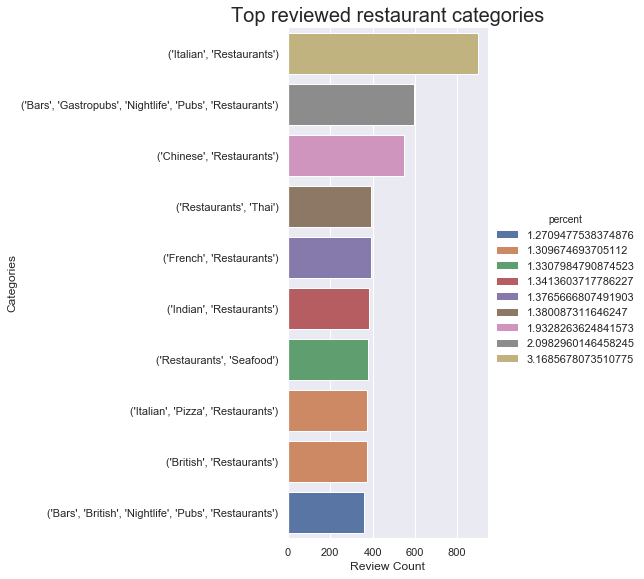

categories  review_count  \
688                            (Italian, Restaurants)           900   
284  (Bars, Gastropubs, Nightlife, Pubs, Restaurants)           596   
523                            (Chinese, Restaurants)           549   
740                               (Restaurants, Thai)           392   
666                             (French, Restaurants)           391   
683                             (Indian, Restaurants)           381   
729                            (Restaurants, Seafood)           378   
686                     (Italian, Pizza, Restaurants)           372   
429                            (British, Restaurants)           372   
220     (Bars, British, Nightlife, Pubs, Restaurants)           361   

     cum_review_count   percent  cum_percent  
688             24957  3.168568     3.168568  
284              9405  2.098296     5.266864  
523             17259  1.932826     7.199690  
740             28108  1.380087     8.579777  
666             22594  1.376567     9.956344  
683             23569  1.341360    11.297705  
729             27273  1.330798    12.628503  
686             24047  1.309675    13.938178  
429             14162  1.309675    15.247852  
220              7027  1.270948    16.518800

In [384]:

def common_comb(df):
    '''
    Function to show the most commonly reviewed keyword tuples / combinations from the business categories column. 
    
    '''
    df_x = pd.DataFrame(df.groupby(df['categories'].map(tuple))['review_count'].sum())
    df_x.reset_index(level=0, inplace=True)
    df_x['cum_review_count'] = df_x['review_count'].cumsum(axis=0)
    df_x['percent'] = (df_x['review_count']/df_x['review_count'].sum())*100
    df_x = df_x.sort_values(['percent'], ascending=0)
    df_x['cum_percent'] = df_bpc['percent'].cumsum(axis=0)
    df_x = df_x.sort_values(['percent'], ascending=0)
    
    sns.catplot(x='review_count', y='categories', data=df_x.head(10), kind='bar', 
           hue='percent', dodge=False, height=8,)
    plt.title('Top reviewed restaurant categories', fontsize=20)
    plt.xlabel('Review Count')
    plt.ylabel('Categories')
    plt.show()
    
    return df_x.head(10)

common_comb(cat_df)

What we'd like to do next is see the most commonly reviewed single words in the categories we need to figure out how to extract the words from the tuples... it may be more convenient to import a partially cleaned data set including individual rows for each review and then counting words based on occurence in each row. 

In [322]:
from collections import Counter

In [419]:
com_word = sum(cat_df.categories, [])
c = Counter(com_word)
c.most_common(10)


[('Restaurants', 1605),
 ('Food', 377),
 ('Nightlife', 275),
 ('Bars', 269),
 ('Coffee & Tea', 239),
 ('Fast Food', 237),
 ('British', 173),
 ('Cafes', 155),
 ('Italian', 149),
 ('Sandwiches', 135)]

In [418]:
top_words = [i[0] for i in c.most_common(25)]
top_words[0:5]

['Restaurants', 'Food', 'Nightlife', 'Bars', 'Coffee & Tea']

In [421]:
!ls

Data Cleaning.ipynb          User Data EDA.ipynb
Google Api Calls-Copy1.ipynb Yelp API Request.ipynb
Google Api Calls.ipynb       edinburgh_reviews.csv
Restaurant Data EDA.ipynb    nested_info.csv


In [422]:
edin_revs = pd.read_csv('edinburgh_reviews.csv')

In [423]:
edin_revs.head()

Unnamed: 0             business_id                 name       city  \
0        1900  F31RycVVooeIOp9jsXmg6g  "The Bluebird Cafe"  Edinburgh   
1        1901  F31RycVVooeIOp9jsXmg6g  "The Bluebird Cafe"  Edinburgh   
2        1903  F31RycVVooeIOp9jsXmg6g  "The Bluebird Cafe"  Edinburgh   
3        1904  F31RycVVooeIOp9jsXmg6g  "The Bluebird Cafe"  Edinburgh   
4        1907  F31RycVVooeIOp9jsXmg6g  "The Bluebird Cafe"  Edinburgh   

                                          categories               review_id  \
0  Breakfast & Brunch;Diners;Restaurants;Cafes;Br...  b31UZTy2TvnFtkfygJG40Q   
1  Breakfast & Brunch;Diners;Restaurants;Cafes;Br...  jYxWLyWrWy8dJFQs9DEuEg   
2  Breakfast & Brunch;Diners;Restaurants;Cafes;Br...  GGWxoYbx_h2x7a46m0MYRA   
3  Breakfast & Brunch;Diners;Restaurants;Cafes;Br...  PslbThtGZ_yOWZxAFc3GVg   
4  Breakfast & Brunch;Diners;Restaurants;Cafes;Br...  oRYhx_qYK5slteB5nyEAiQ   

                  user_id  stars  
0  bcxcQhp0sKYd9eUnEVUzPA      5  
1  RFxjYeLW_aYLdVW3PBwFNg      4  
2  BhYROfCjIJsKUk22_IVHig      3  
3  J_qpI2jCkwv7vPNz_9JeqA      4  
4  NMelfYHO9mncdmZLIABLgQ      5

In [424]:
edin_revs['categories'] = edin_revs.categories.map(lambda x: [i.strip() for i in sorted(x.split(';'))])

In [425]:
edin_revs.head()

Unnamed: 0             business_id                 name       city  \
0        1900  F31RycVVooeIOp9jsXmg6g  "The Bluebird Cafe"  Edinburgh   
1        1901  F31RycVVooeIOp9jsXmg6g  "The Bluebird Cafe"  Edinburgh   
2        1903  F31RycVVooeIOp9jsXmg6g  "The Bluebird Cafe"  Edinburgh   
3        1904  F31RycVVooeIOp9jsXmg6g  "The Bluebird Cafe"  Edinburgh   
4        1907  F31RycVVooeIOp9jsXmg6g  "The Bluebird Cafe"  Edinburgh   

                                          categories               review_id  \
0  [Breakfast & Brunch, British, Cafes, Diners, R...  b31UZTy2TvnFtkfygJG40Q   
1  [Breakfast & Brunch, British, Cafes, Diners, R...  jYxWLyWrWy8dJFQs9DEuEg   
2  [Breakfast & Brunch, British, Cafes, Diners, R...  GGWxoYbx_h2x7a46m0MYRA   
3  [Breakfast & Brunch, British, Cafes, Diners, R...  PslbThtGZ_yOWZxAFc3GVg   
4  [Breakfast & Brunch, British, Cafes, Diners, R...  oRYhx_qYK5slteB5nyEAiQ   

                  user_id  stars  
0  bcxcQhp0sKYd9eUnEVUzPA      5  
1  RFxjYeLW_aYLdVW3PBwFNg      4  
2  BhYROfCjIJsKUk22_IVHig      3  
3  J_qpI2jCkwv7vPNz_9JeqA      4  
4  NMelfYHO9mncdmZLIABLgQ      5

In [432]:
com_word2 = sum(edin_revs.categories, [])
d = Counter(com_word2)
d.most_common(40)[0:5]

[('Restaurants', 12552),
 ('Nightlife', 3398),
 ('Bars', 3330),
 ('Food', 3318),
 ('Coffee & Tea', 2296)]

In [431]:
comwords_df = pd.DataFrame(d.most_common(40), columns=['category', 'review_count'])
comwords_df.head()

category  review_count
0   Restaurants         12552
1     Nightlife          3398
2          Bars          3330
3          Food          3318
4  Coffee & Tea          2296

Text(0, 0.5, 'Number of Reviews')

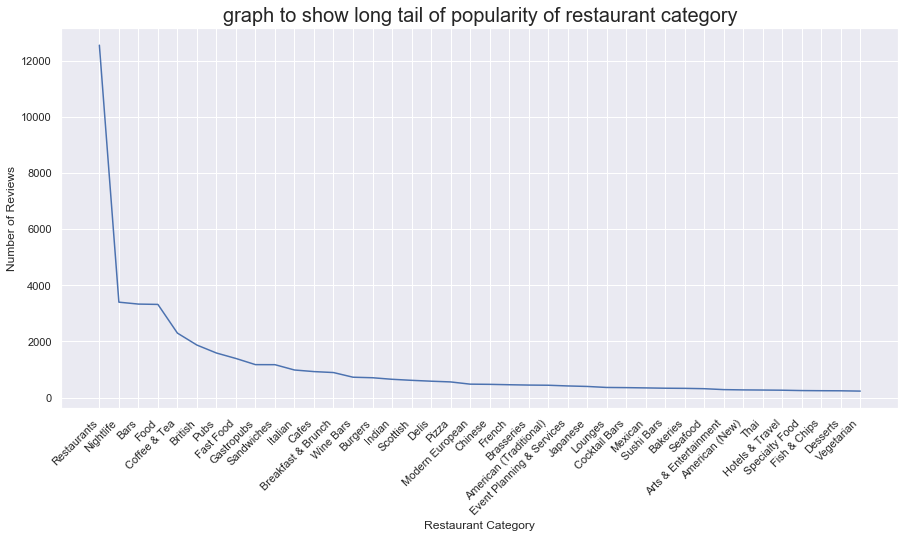

In [445]:
plt.plot(comwords_df['category'], comwords_df['review_count']);
plt.xticks(rotation=45, ha='right');
plt.title('graph to show long tail of popularity of restaurant category', fontsize=20)
plt.xlabel('Restaurant Category', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)


## The above graph is indicative as the top 4 reviewed categories could be contenders for removal. This grapht to be redrawn without the uneccessary categories and all the missing (less reviewed) categories brought in to see the true long tail. 